In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import librosa

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Audio Classification/Dataset/Final Path File/final_path.csv')
df['Emotion'] = df['Emotion'].str.replace('female_', '')
df['Emotion'] = df['Emotion'].str.replace('male_', '')

In [4]:
d = dict(df['Emotion'].value_counts())
d = dict(sorted(d.items()))
emotions = list(d.keys())
e_counts = list(d.values())

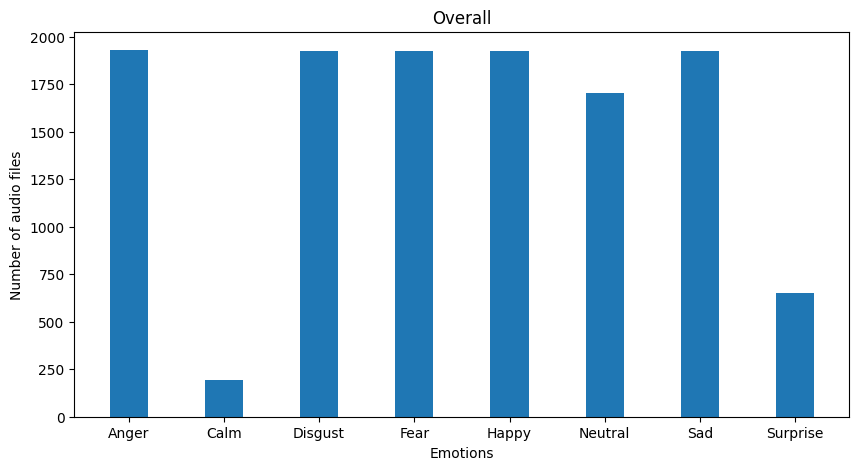

In [5]:
fig = plt.figure(figsize = (10, 5))
plt.bar(emotions, e_counts, width = 0.4)
plt.xlabel('Emotions')
plt.ylabel('Number of audio files')
plt.title('Overall')
plt.show()

In [6]:
N = len(d)

In [7]:
df_male = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Audio Classification/Dataset/Final Path File/male.csv')

In [8]:
df_female = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Audio Classification/Dataset/Final Path File/female.csv')

In [9]:
ind = np.arange(N)
width = 0.35

In [10]:
dfm = dict(df_male['Emotion'].value_counts())
dfm = dict(sorted(dfm.items()))
emotions_m = list(dfm.keys())
e_counts_m = list(dfm.values())

In [11]:
dff = dict(df_female['Emotion'].value_counts())
dff = dict(sorted(dff.items()))
emotions_f = list(dff.keys())
e_counts_f = list(dff.values())

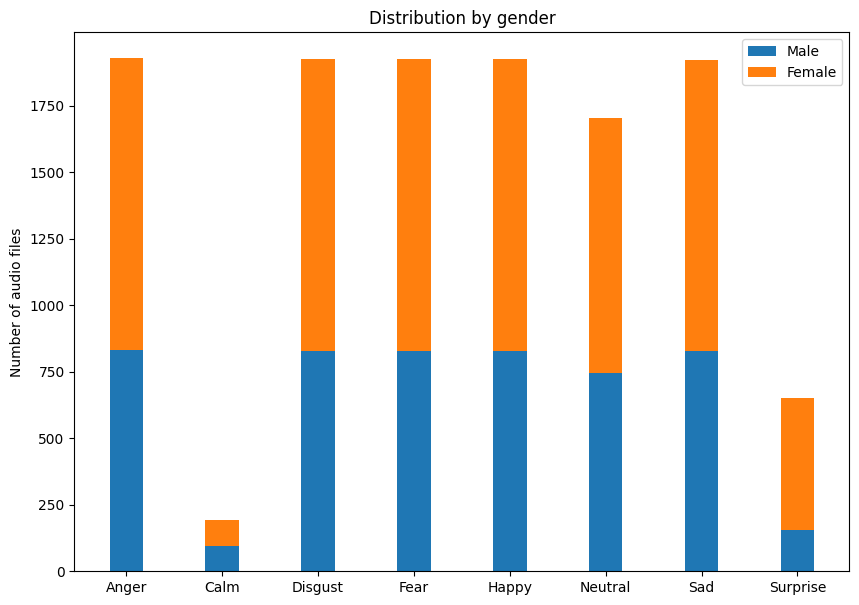

In [12]:
fig = plt.subplots(figsize =(10, 7))
p1 = plt.bar(ind, e_counts_m, width)
p2 = plt.bar(ind, e_counts_f, width, bottom = e_counts_m)
plt.ylabel('Number of audio files')
plt.title('Distribution by gender')
plt.xticks(ind, tuple(emotions))
plt.yticks(np.arange(0, max(e_counts), 250))
plt.legend((p1[0], p2[0]), ('Male', 'Female'))
plt.show()

In [13]:
overall = 0
dl = []
min_dur = float('inf')
max_dur = float('-inf')
for audio_file in df['Path']:
  dur = librosa.get_duration(path = audio_file)
  dl.append(dur)
  min_dur = min(min_dur, dur)
  max_dur = max(max_dur, dur)
  overall += dur
overall_avg = overall / df['Path'].shape[0]
print('Overall Average Length of Video is', overall_avg, 'seconds')
dl.sort()
overall_med = None
if len(dl) % 2 == 1:
  overall_med = dl[(len(dl) - 1) // 2]
if len(dl) % 2 == 0:
  overall_med = (dl[len(dl) // 2] + dl[len(dl) // 2 - 1]) / 2
print('Median Duration is', overall_med, 'seconds')
print('Maximum Duration is', max_dur, 'seconds')
print('Minimum Duration is', min_dur, 'seconds')
print('Range of Duration is', max_dur - min_dur, 'seconds')
print('Mid Range of Duration is', (max_dur + min_dur) / 2, 'seconds')

Overall Average Length of Video is 2.6189443854379304 seconds
Median Duration is 2.469125 seconds
Maximum Duration is 7.138730158730159 seconds
Minimum Duration is 1.254075530433358 seconds
Range of Duration is 5.884654628296801 seconds
Mid Range of Duration is 4.196402844581758 seconds


In [14]:
male = 0
dlm = []
male_min_dur = float('inf')
male_max_dur = float('-inf')
for audio_file in df_male['Path']:
  dur = librosa.get_duration(path = audio_file)
  dlm.append(dur)
  male_min_dur = min(male_min_dur, dur)
  male_max_dur = max(male_max_dur, dur)
  male += dur
male_avg = male / df_male['Path'].shape[0]
print('Male voice Average Length of Audio is', male_avg, 'seconds')
dlm.sort()
male_med = None
if len(dlm) % 2 == 1:
  male_med = dlm[(len(dlm) - 1) // 2]
if len(dlm) % 2 == 0:
  male_med = (dlm[len(dlm) // 2] + dlm[len(dlm) // 2 - 1]) / 2
print('Median Duration of male voice is', male_med, 'seconds')
print('Maximum Duration of male voice is', male_max_dur, 'seconds')
print('Minimum Duration of male voice is', male_min_dur, 'seconds')
print('Range of Duration of male voice is', male_max_dur - male_min_dur, 'seconds')
print('Mid Range of Duration of male voice is', (male_max_dur + male_min_dur) / 2, 'seconds')

Male voice Average Length of Audio is 2.7982198816344956 seconds
Median Duration of male voice is 2.6359375 seconds
Maximum Duration of male voice is 7.138730158730159 seconds
Minimum Duration of male voice is 1.2679375 seconds
Range of Duration of male voice is 5.870792658730158 seconds
Mid Range of Duration of male voice is 4.2033338293650795 seconds


In [15]:
female = 0
dlf = []
female_min_dur = float('inf')
female_max_dur = float('-inf')
for audio_file in df_female['Path']:
  dur = librosa.get_duration(path = audio_file)
  dlf.append(dur)
  female_min_dur = min(female_min_dur, dur)
  female_max_dur = max(female_max_dur, dur)
  female += dur
female_avg = female / df_female['Path'].shape[0]
print('Female voice Average Length of Audio is', female_avg, 'seconds')
dlf.sort()
female_med = None
if len(dlf) % 2 == 1:
  female_med = dlf[(len(dlf) - 1) // 2]
if len(dlf) % 2 == 0:
  female_med = (dlf[len(dlf) // 2] + dlf[len(dlf) // 2 - 1]) / 2
print('Median Duration of female voice is', female_med, 'seconds')
print('Maximum Duration of female voice is', female_max_dur, 'seconds')
print('Minimum Duration for female voice is', female_min_dur, 'seconds')
print('Range of Duration for female voice is', female_max_dur - female_min_dur, 'seconds')
print('Mid Range of Duration for female voice is', (female_max_dur + female_min_dur) / 2, 'seconds')

Female voice Average Length of Audio is 2.488080407543459 seconds
Median Duration of female voice is 2.3356875 seconds
Maximum Duration of female voice is 5.105104166666667 seconds
Minimum Duration for female voice is 1.254075530433358 seconds
Range of Duration for female voice is 3.851028636233309 seconds
Mid Range of Duration for female voice is 3.1795898485500125 seconds
